Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   Custom

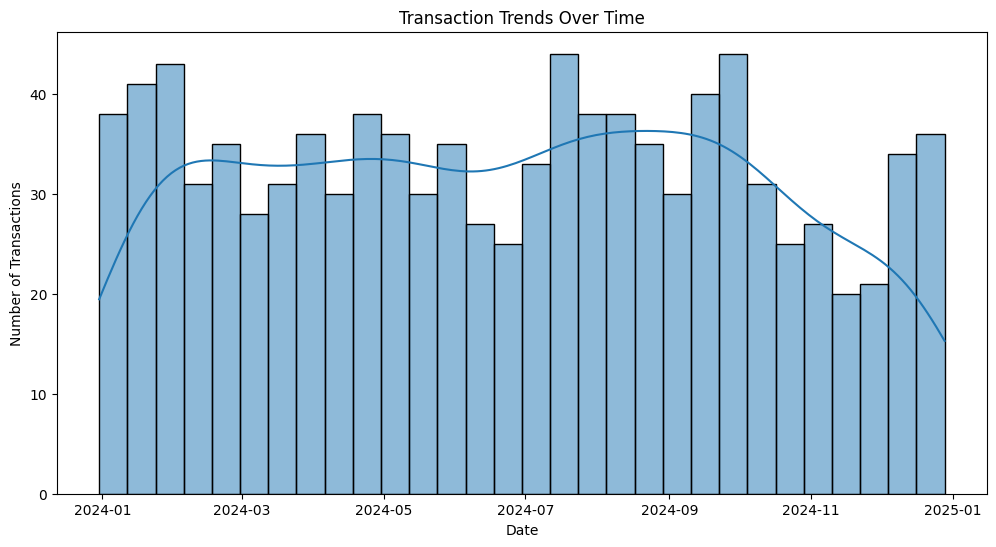

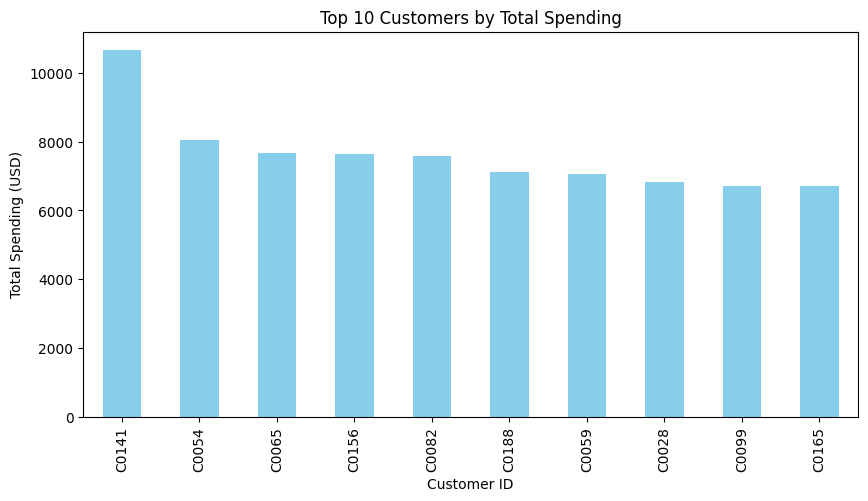

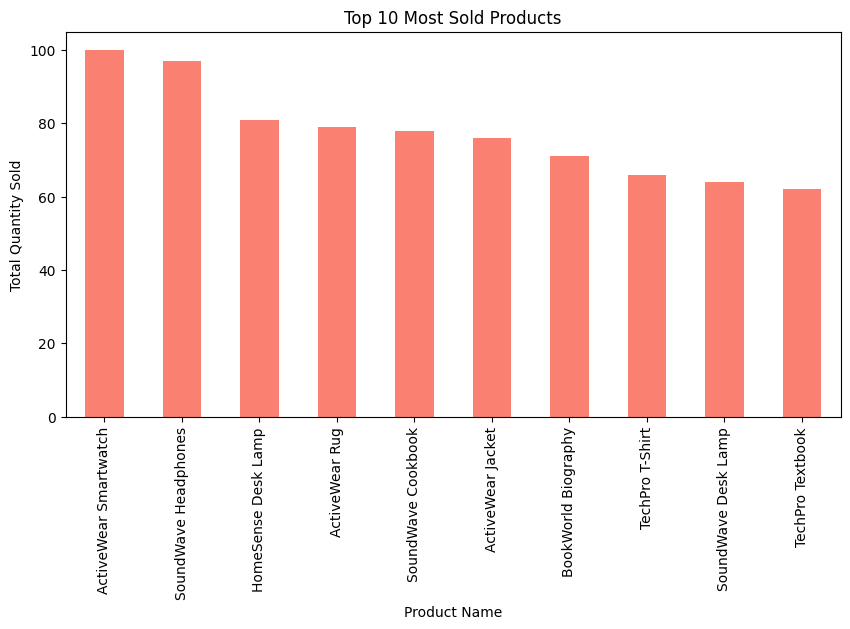

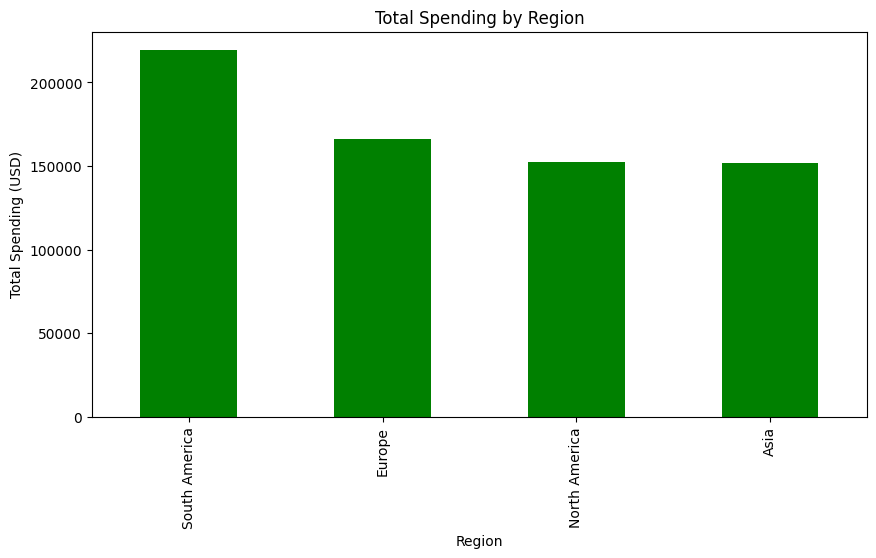

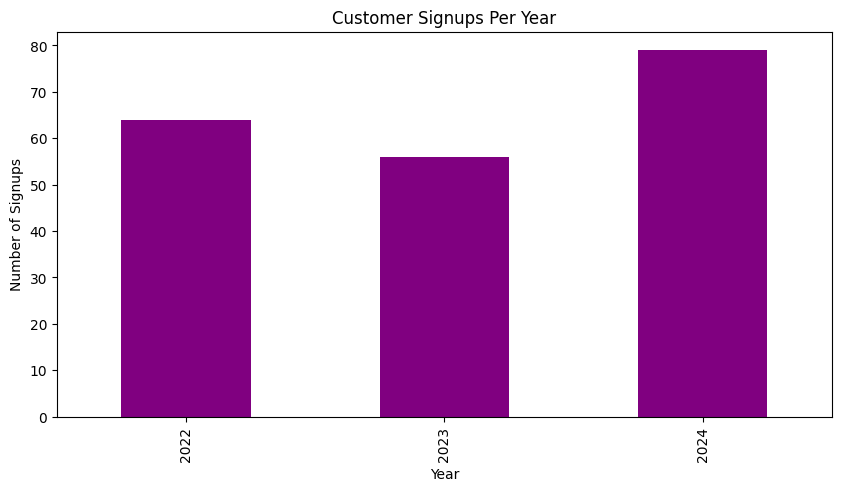

EDA Completed Successfully!


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge transactions with customer and product data
data = transactions.merge(customers, on='CustomerID', how='left')
data = data.merge(products, on='ProductID', how='left')

# Summary statistics
print("Customers Dataset:")
print(customers.info())
print(customers.describe())

print("Transactions Dataset:")
print(transactions.info())
print(transactions.describe())

print("Products Dataset:")
print(products.info())
print(products.describe())

# Missing values
print("Missing values in datasets:")
print(data.isnull().sum())

# Transaction trends over time
plt.figure(figsize=(12,6))
sns.histplot(data['TransactionDate'], bins=30, kde=True)
plt.title('Transaction Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Top 10 customers by total spending
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.show()

# Product popularity
popular_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.show()

# Region-wise spending
region_spending = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_spending.plot(kind='bar', figsize=(10,5), color='green')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending (USD)')
plt.show()

# Signup trends
data['SignupYear'] = data['SignupDate'].dt.year
signup_trends = data.groupby('SignupYear')['CustomerID'].nunique()
signup_trends.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Customer Signups Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

print("EDA Completed Successfully!")